# Crop Production Around The World - FAO
**Note:** The link to the Tableau story can be found here: https://public.tableau.com/app/profile/salma.amr.elmasry/viz/TableauITIProject/Story1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Loading And Preparing The Data
First we will load our data, we will use **2 datasets**:
1) The world bank crop production index dataset: https://data.worldbank.org/indicator/AG.PRD.CROP.XD?view=chart
2) The Kaggle Crop statistics FAO dataset: https://www.kaggle.com/datasets/raghavramasamy/crop-statistics-fao-all-countries

### 1) The world bank crop production index dataset
The **first dataset** contains 2 parts:
- The first part includes The crop production index for each country in each year from 1961 till 2020. **The crop production index** is a measure of the agricultural output of a country relative to a reference period (2014-2016). It is calculated by dividing the agricultural output of a given year by the average output of the reference period, and multiplying the result by 100.
<br>
<br>
The values are measured in international dollars and are normalized to the base period 2014-2016, which means that the data is adjusted for inflation and currency fluctuations over time, so that the values can be compared across different countries and regions.

In [2]:
prod_crop_wb = pd.read_csv("Crop Production Index/API_AG.PRD.CROP.XD_DS2_en_csv_v2_5359647.csv", header=3)
prod_crop_wb.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1961,1962,1963,1964,1965,1966,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,Crop production index (2014-2016 = 100),AG.PRD.CROP.XD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Crop production index (2014-2016 = 100),AG.PRD.CROP.XD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,Crop production index (2014-2016 = 100),AG.PRD.CROP.XD,44.24,45.15,44.02,47.99,49.71,48.84,...,81.18,94.48,93.0,99.78,95.68,104.54,100.66,94.87,121.77,129.30
3,Africa Western and Central,AFW,Crop production index (2014-2016 = 100),AG.PRD.CROP.XD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,AGO,Crop production index (2014-2016 = 100),AG.PRD.CROP.XD,21.63,23.11,22.46,24.38,25.26,26.42,...,100.99,79.19,114.2,97.55,100.38,102.07,102.56,106.10,108.33,106.99


In [3]:
prod_crop_wb.shape

(266, 64)

As we can see our dataset has many rows where the data is missing for the whole years or most of them.<br> <br>
We defined our scope to cover **the latest 20 years from 2000 to 2020**.<br><br>

In [4]:
prod_crop_wb = prod_crop_wb[prod_crop_wb.columns[0:2].append(prod_crop_wb.columns[-21:])]
prod_crop_wb.head()

,Country Name,Country Code,2000,2001,2002,2003,2004,2005,2006,2007,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,51.39,53.28,63.83,69.54,62.02,77.6,74.15,84.84,...,81.18,94.48,93.0,99.78,95.68,104.54,100.66,94.87,121.77,129.30
3,Africa Western and Central,AFW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,AGO,26.27,31.92,37.62,41.67,48.09,52.2,53.18,61.78,...,100.99,79.19,114.2,97.55,100.38,102.07,102.56,106.10,108.33,106.99


In [5]:
prod_crop_wb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  266 non-null    object 
 1   Country Code  266 non-null    object 
 2   2000          191 non-null    float64
 3   2001          191 non-null    float64
 4   2002          191 non-null    float64
 5   2003          191 non-null    float64
 6   2004          191 non-null    float64
 7   2005          191 non-null    float64
 8   2006          193 non-null    float64
 9   2007          193 non-null    float64
 10  2008          193 non-null    float64
 11  2009          193 non-null    float64
 12  2010          193 non-null    float64
 13  2011          193 non-null    float64
 14  2012          195 non-null    float64
 15  2013          195 non-null    float64
 16  2014          195 non-null    float64
 17  2015          195 non-null    float64
 18  2016          195 non-null    

When filtering our data we will find that it only has 4 rows with some missing, it will not affect the analysis so we will drop the few rows with missing data.<br><br>
We can't impute them using the other countries or using the years Before as they are also nulls, we have no choice but to drop those.<br> <br>
Apparently the nulls are because the start of measurement of production in these countries started in later years and we have no records of previous production.<br> <br>
As our analysis is sensitive in this point and they are only few rows it is better to drop them from our analysis rather than imputing the missing values and working on inaccurate data.

In [6]:
# drop rows where columns[-21:] is nulls
prod_crop_wb = prod_crop_wb.dropna(subset=prod_crop_wb.columns[-21:])

In [7]:
prod_crop_wb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 2 to 265
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  191 non-null    object 
 1   Country Code  191 non-null    object 
 2   2000          191 non-null    float64
 3   2001          191 non-null    float64
 4   2002          191 non-null    float64
 5   2003          191 non-null    float64
 6   2004          191 non-null    float64
 7   2005          191 non-null    float64
 8   2006          191 non-null    float64
 9   2007          191 non-null    float64
 10  2008          191 non-null    float64
 11  2009          191 non-null    float64
 12  2010          191 non-null    float64
 13  2011          191 non-null    float64
 14  2012          191 non-null    float64
 15  2013          191 non-null    float64
 16  2014          191 non-null    float64
 17  2015          191 non-null    float64
 18  2016          191 non-null    

In [8]:
prod_crop_wb.head()

,Country Name,Country Code,2000,2001,2002,2003,2004,2005,2006,2007,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
2,Afghanistan,AFG,51.39,53.28,63.83,69.54,62.02,77.60,74.15,84.84,...,81.18,94.48,93.00,99.78,95.68,104.54,100.66,94.87,121.77,129.30
4,Angola,AGO,26.27,31.92,37.62,41.67,48.09,52.20,53.18,61.78,...,100.99,79.19,114.20,97.55,100.38,102.07,102.56,106.10,108.33,106.99
5,Albania,ALB,51.88,53.23,52.12,54.89,58.48,58.38,61.97,61.10,...,87.45,93.86,93.67,95.94,99.91,104.15,105.77,106.18,107.65,113.91
8,United Arab Emirates,ARE,355.97,214.47,202.80,186.66,203.61,200.53,180.50,177.96,...,70.02,65.99,67.83,90.32,104.59,105.09,98.67,99.17,102.54,93.21
9,Argentina,ARG,60.46,63.57,64.78,67.31,66.15,77.30,75.16,85.37,...,92.94,81.59,90.17,93.71,103.78,102.51,107.70,92.77,114.56,108.89


In [9]:
prod_crop_wb.shape

(191, 23)

- The second part contains the region and income group for each country code, the income group is one of the following four (lower, upper, lower middle or upper middle).

In [10]:
prod_crop_wb_rig = pd.read_csv("Crop Production Index/Metadata_Country_API_AG.PRD.CROP.XD_DS2_en_csv_v2_5359647.csv")
prod_crop_wb_rig.head()

,Country Code,Region,IncomeGroup,SpecialNotes,TableName
0,ABW,Latin America & Caribbean,High income,NaN,Aruba
1,AFE,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern
2,AFG,South Asia,Low income,The reporting period for national accounts dat...,Afghanistan
3,AFW,NaN,NaN,"22 countries, stretching from the westernmost ...",Africa Western and Central
4,AGO,Sub-Saharan Africa,Lower middle income,The World Bank systematically assesses the app...,Angola


In [11]:
prod_crop_wb_rig.shape

(265, 5)

In [12]:
prod_crop_wb_rig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country Code  265 non-null    object
 1   Region        217 non-null    object
 2   IncomeGroup   216 non-null    object
 3   SpecialNotes  127 non-null    object
 4   TableName     265 non-null    object
dtypes: object(5)
memory usage: 10.5+ KB


We will join this dataset with the first one on country code to add the region and income group for each country.

In [13]:
prod_crop_wb_joined = prod_crop_wb.merge(prod_crop_wb_rig, on='Country Code', how='left')
prod_crop_wb_joined.head()

,Country Name,Country Code,2000,2001,2002,2003,2004,2005,2006,2007,...,2015,2016,2017,2018,2019,2020,Region,IncomeGroup,SpecialNotes,TableName
0,Afghanistan,AFG,51.39,53.28,63.83,69.54,62.02,77.60,74.15,84.84,...,95.68,104.54,100.66,94.87,121.77,129.30,South Asia,Low income,The reporting period for national accounts dat...,Afghanistan
1,Angola,AGO,26.27,31.92,37.62,41.67,48.09,52.20,53.18,61.78,...,100.38,102.07,102.56,106.10,108.33,106.99,Sub-Saharan Africa,Lower middle income,The World Bank systematically assesses the app...,Angola
2,Albania,ALB,51.88,53.23,52.12,54.89,58.48,58.38,61.97,61.10,...,99.91,104.15,105.77,106.18,107.65,113.91,Europe & Central Asia,Upper middle income,NaN,Albania
3,United Arab Emirates,ARE,355.97,214.47,202.80,186.66,203.61,200.53,180.50,177.96,...,104.59,105.09,98.67,99.17,102.54,93.21,Middle East & North Africa,High income,NaN,United Arab Emirates
4,Argentina,ARG,60.46,63.57,64.78,67.31,66.15,77.30,75.16,85.37,...,103.78,102.51,107.70,92.77,114.56,108.89,Latin America & Caribbean,Upper middle income,The World Bank systematically assesses the app...,Argentina


In [14]:
prod_crop_wb_joined.shape

(191, 27)

Now it is time to restructure the dataframe and get only the useful info
- First, we will drop the unwanted columns like the specialNotes and TableName columns.
- Second we will transfer the wide into long format for further joining and easier analysis.

In [15]:
prod_crop_wb_joined = prod_crop_wb_joined.drop(['SpecialNotes','TableName'], axis=1)
prod_crop_wb_joined.head()

,Country Name,Country Code,2000,2001,2002,2003,2004,2005,2006,2007,...,2013,2014,2015,2016,2017,2018,2019,2020,Region,IncomeGroup
0,Afghanistan,AFG,51.39,53.28,63.83,69.54,62.02,77.60,74.15,84.84,...,93.00,99.78,95.68,104.54,100.66,94.87,121.77,129.30,South Asia,Low income
1,Angola,AGO,26.27,31.92,37.62,41.67,48.09,52.20,53.18,61.78,...,114.20,97.55,100.38,102.07,102.56,106.10,108.33,106.99,Sub-Saharan Africa,Lower middle income
2,Albania,ALB,51.88,53.23,52.12,54.89,58.48,58.38,61.97,61.10,...,93.67,95.94,99.91,104.15,105.77,106.18,107.65,113.91,Europe & Central Asia,Upper middle income
3,United Arab Emirates,ARE,355.97,214.47,202.80,186.66,203.61,200.53,180.50,177.96,...,67.83,90.32,104.59,105.09,98.67,99.17,102.54,93.21,Middle East & North Africa,High income
4,Argentina,ARG,60.46,63.57,64.78,67.31,66.15,77.30,75.16,85.37,...,90.17,93.71,103.78,102.51,107.70,92.77,114.56,108.89,Latin America & Caribbean,Upper middle income


In [16]:
# Unpivot the columns containing years
prod_crop_unpivoted= pd.melt(prod_crop_wb_joined, id_vars=['Country Name', 'Country Code', 'Region', 'IncomeGroup'], var_name='Year', value_name='Production')

prod_crop_unpivoted.head()

,Country Name,Country Code,Region,IncomeGroup,Year,Production
0,Afghanistan,AFG,South Asia,Low income,2000,51.39
1,Angola,AGO,Sub-Saharan Africa,Lower middle income,2000,26.27
2,Albania,ALB,Europe & Central Asia,Upper middle income,2000,51.88
3,United Arab Emirates,ARE,Middle East & North Africa,High income,2000,355.97
4,Argentina,ARG,Latin America & Caribbean,Upper middle income,2000,60.46


In [17]:
prod_crop_unpivoted.shape

(4011, 6)

In [18]:
countries = prod_crop_unpivoted['Country Name'].unique()
len(countries)

191

In [19]:
prod_crop_unpivoted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4011 entries, 0 to 4010
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  4011 non-null   object 
 1   Country Code  4011 non-null   object 
 2   Region        4011 non-null   object 
 3   IncomeGroup   3990 non-null   object 
 4   Year          4011 non-null   object 
 5   Production    4011 non-null   float64
dtypes: float64(1), object(5)
memory usage: 188.1+ KB


In [20]:
prod_crop_unpivoted.to_csv('Wb_crop_production.csv', index=False)

### 2) The kaggle crop production statistics - FAO dataset
The **second dataset** contains:
- Area Code --> code for each area or country (numerical)
- Area --> Corresponds to the country name (geographical)
- Item Code --> Code for each product
- Item --> The crop itself
- Element Code --> Determines the element we are measuring
- Elemnet --> area harvested  in ha or production in tons
- Year Code --> includes the year
- Year --> also includes the year (redundant)
- Unit --> which unit are we measuring the element with
- Value --> the value measured per item per element with unit
- Flag --> extra so it will be removed

In [21]:
kg_crops = pd.read_csv("Kaggle Data set/Crops_AllData_Normalized.csv", encoding="ISO-8859-1") # wasn't encoded with the utf-8
kg_crops.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,2,Afghanistan,221,"Almonds, with shell",5312,Area harvested,1975,1975,ha,0.0,F
1,2,Afghanistan,221,"Almonds, with shell",5312,Area harvested,1976,1976,ha,5900.0,F
2,2,Afghanistan,221,"Almonds, with shell",5312,Area harvested,1977,1977,ha,6000.0,F
3,2,Afghanistan,221,"Almonds, with shell",5312,Area harvested,1978,1978,ha,6000.0,F
4,2,Afghanistan,221,"Almonds, with shell",5312,Area harvested,1979,1979,ha,6000.0,F


In [22]:
kg_crops.shape

(2513868, 11)

- First, we need to filter the data that is in our scope (from 2000 to 2020).
- Second we will filter to get the countries that corresponds to our previous data.
- Third, we will filter on the element column to get only the area harvested and production.
- Forth, we will drop the Flag, the elemnt code and the year code columns as they are redundant.

In [23]:
kg_crops_scope = kg_crops[(kg_crops.Year >= 2000) & (kg_crops.Year <= 2020)]
kg_crops_scope.shape

(947263, 11)

In [24]:
kg_crops_scope = kg_crops_scope[kg_crops_scope.Area.isin(countries)]
kg_crops_scope.shape

(561162, 11)

In [25]:
len(kg_crops_scope.Area.unique())

163

Only 163 matching countries was found in this dataset from the 191, pretty good number though so we will continue.

In [26]:
kg_crops_scope = kg_crops_scope[kg_crops_scope.Element.isin(['Area harvested', 'Production'])]
kg_crops_scope.shape

(384680, 11)

In [27]:
kg_crops_scope = kg_crops_scope.drop(['Flag','Year Code', 'Element Code'], axis=1)
kg_crops_scope.head()

,Area Code,Area,Item Code,Item,Element,Year,Unit,Value
25,2,Afghanistan,221,"Almonds, with shell",Area harvested,2000,ha,7000.0
26,2,Afghanistan,221,"Almonds, with shell",Area harvested,2001,ha,9000.0
27,2,Afghanistan,221,"Almonds, with shell",Area harvested,2002,ha,5500.0
28,2,Afghanistan,221,"Almonds, with shell",Area harvested,2003,ha,5700.0
29,2,Afghanistan,221,"Almonds, with shell",Area harvested,2004,ha,12000.0


Now we will concatenate the element and the unit as in our dataset all area harvested in measured in ha (hectare = 2.47 acre) and all production is measured in tonnes.

In [28]:
kg_crops_scope['Element/Unit'] = kg_crops_scope['Element'] + '/' + kg_crops_scope['Unit']
kg_crops_scope = kg_crops_scope.drop(['Element', 'Unit'], axis=1)
kg_crops_scope.head()

,Area Code,Area,Item Code,Item,Year,Value,Element/Unit
25,2,Afghanistan,221,"Almonds, with shell",2000,7000.0,Area harvested/ha
26,2,Afghanistan,221,"Almonds, with shell",2001,9000.0,Area harvested/ha
27,2,Afghanistan,221,"Almonds, with shell",2002,5500.0,Area harvested/ha
28,2,Afghanistan,221,"Almonds, with shell",2003,5700.0,Area harvested/ha
29,2,Afghanistan,221,"Almonds, with shell",2004,12000.0,Area harvested/ha


In [29]:
kg_crops_scope['Element/Unit'].value_counts()

Production/tonnes    194530
Area harvested/ha    190150
Name: Element/Unit, dtype: int64

Now we will pivot the Element/Unit column as it contains two measures that we may use often alone.

In [30]:
kg_crops_scope = kg_crops_scope.pivot_table(index=['Area Code', 'Area', 'Item Code', 'Item', 'Year'], 
                                    columns='Element/Unit', 
                                    values='Value')
kg_crops_scope = kg_crops_scope.reset_index()
kg_crops_scope.head()

Element/Unit,Area Code,Area,Item Code,Item,Year,Area harvested/ha,Production/tonnes
0,1,Armenia,15,Wheat,2000,106581.0,177762.0
1,1,Armenia,15,Wheat,2001,108554.0,241679.0
2,1,Armenia,15,Wheat,2002,119224.0,284670.0
3,1,Armenia,15,Wheat,2003,126112.0,216698.0
4,1,Armenia,15,Wheat,2004,124511.0,291556.0


In [31]:
print(kg_crops_scope.index.name)

None


In [32]:
kg_crops_scope.shape

(184247, 7)

In [33]:
kg_crops_scope.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184247 entries, 0 to 184246
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Area Code          184247 non-null  int64  
 1   Area               184247 non-null  object 
 2   Item Code          184247 non-null  int64  
 3   Item               184247 non-null  object 
 4   Year               184247 non-null  int64  
 5   Area harvested/ha  179221 non-null  float64
 6   Production/tonnes  184023 non-null  float64
dtypes: float64(2), int64(3), object(2)
memory usage: 9.8+ MB


We have nulls in the Area harvested/ha and Production/tonnes columns, so let's investigate them further.

In [36]:
print(len(kg_crops_scope.Item.unique()))
print(len(kg_crops_scope.Area.unique()))
#we have 174 different products and 163 countries

174
163


In [37]:
kg_crops_scope[kg_crops_scope['Area harvested/ha'].isna()]

Element/Unit,Area Code,Area,Item Code,Item,Year,Area harvested/ha,Production/tonnes
443,1,Armenia,449,Mushrooms and truffles,2008,NaN,60.0
444,1,Armenia,449,Mushrooms and truffles,2009,NaN,70.0
445,1,Armenia,449,Mushrooms and truffles,2010,NaN,80.0
446,1,Armenia,449,Mushrooms and truffles,2011,NaN,100.0
447,1,Armenia,449,Mushrooms and truffles,2012,NaN,250.0
...,...,...,...,...,...,...,...
181576,351,China,30,"Rice, paddy (rice milled equivalent)",2017,NaN,143024776.0
181577,351,China,30,"Rice, paddy (rice milled equivalent)",2018,NaN,142790557.0
181578,351,China,30,"Rice, paddy (rice milled equivalent)",2019,NaN,141007276.0
182947,351,China,446,"Maize, green",2000,NaN,95.0


In [38]:
kg_crops_scope[kg_crops_scope['Production/tonnes'].isna()]

Element/Unit,Area Code,Area,Item Code,Item,Year,Area harvested/ha,Production/tonnes
11026,11,Austria,773,Flax fibre and tow,2017,1.0,NaN
11027,11,Austria,773,Flax fibre and tow,2018,0.0,NaN
11028,11,Austria,773,Flax fibre and tow,2019,0.0,NaN
14265,18,Bhutan,222,"Walnuts, with shell",2006,0.0,NaN
14879,18,Bhutan,1729,"Treenuts, Total",2006,0.0,NaN
...,...,...,...,...,...,...,...
180351,255,Belgium,677,Hops,2019,200.0,NaN
180372,255,Belgium,777,Hemp tow waste,2018,140.0,NaN
180373,255,Belgium,777,Hemp tow waste,2019,100.0,NaN
180392,255,Belgium,826,"Tobacco, unmanufactured",2018,40.0,NaN


As we can see some Items or Crops doesn't have values for area harvested or production, this values are simply missing because it was not recorded this year for that crop (completely at random), we can impute using the average of the prvious years but it is preferred to keep while doing our visualizations. <br> <br>
Finally, we need to keep in mind not to aggregate production for example and compare to harvested area with nulls in the harvested area or vice versa.

**We will save our final 2 datasets into csv files to use in the coming tableau visualizations.**

In [39]:
kg_crops_scope.to_csv('kg_crop_production.csv', index=False)

## Analysis

### Business Questions Covered
1) What is The crop production Index for each country filtered by years?
2) Which coutries Performs better than the base period in specific years?
3) Which countries performs worse or declining in production?
4) How does the crop Production and Area harvested change over the years for specific crops and specific region/country?
5) Is "Area Harvested" correlated with the amount of production for all crops?
6) Which crops are the outliers (most production) in each region?
7) Which countries has the most variety in crops?
8) Which countries contribute by 80% of production for specific range of years?
9) Which are the top products for specific country in a specific year(s)?

Let's say We are an **import and export company** who wants to analyze crop production all over the world to know which countries to deal with and which crops to import or export from those countries In order to maximize the profit and maintain a stable base.
<br><br>
The **first step** was to examine the production index of each country, the production index is the production of the country compared to the base period 2014-2016, By knowing which countries has average production index greater than the base we can enrich dealing with these countries as they may have plenty of crops to export and they indicate good economy and stable production.
<br><br>
While countries with production declining, may indicate a good place to export our products to, of course with taking care of the economy status and supply and demand in the countries.

**To find which countries to consider exporting to and importing from**, we did the following:
- We made a map using the CountryName column from wb_crop_production data we have.
- We made a ***parameter*** called "Base Production" with 100 as a value.
- We then used the parameter in a ***calculated field*** called "Production Above or Below Base" to divide the countries into 
    - Production Above Base (Green)
    - Moderate Production (Grey)
    - Production Below 0.75 of the Base (Red)
- Then we used the calculated field in the color in the marks to highlight the countries.
- The data is filtered by years which is a multivalued drop down list.
- The Production is added to the tooltip so that it appears with the name when hovering or selecting.

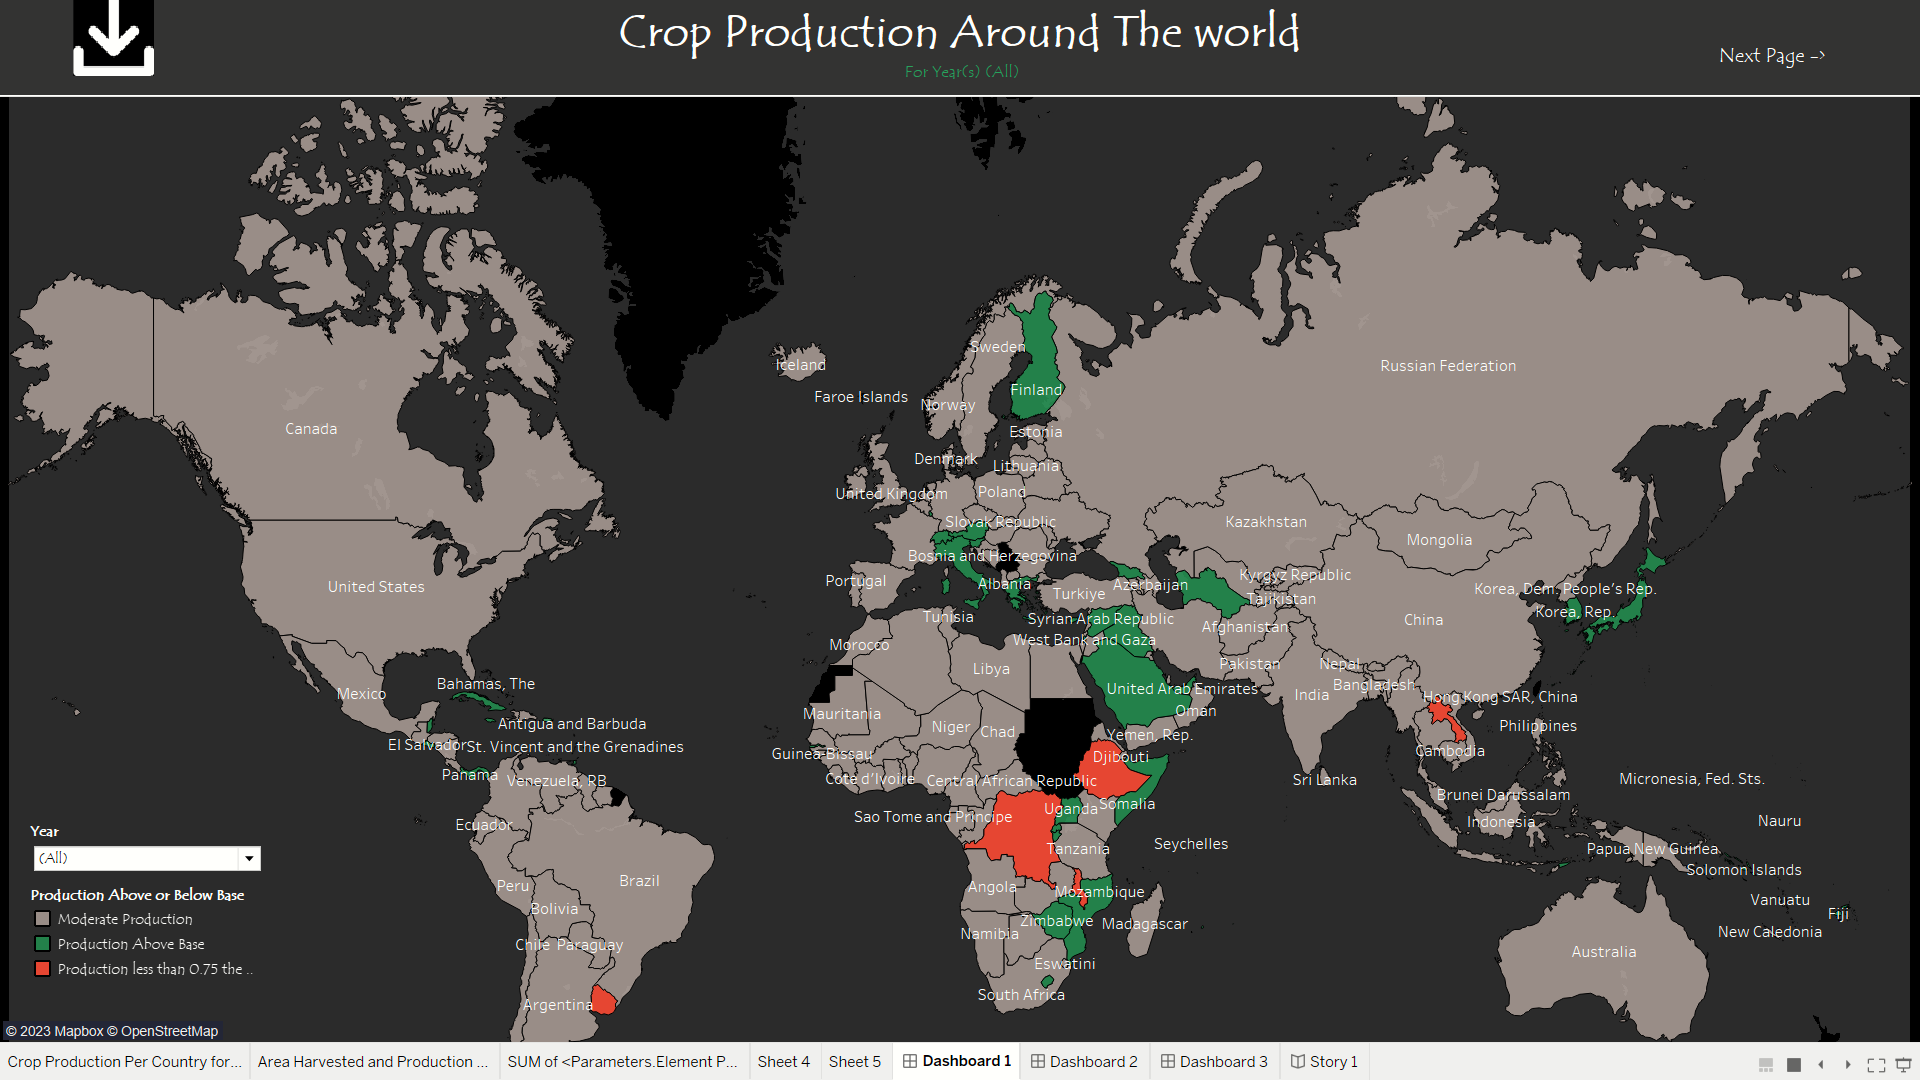

Now, We can easily detect which countries are better to export to or import from through specific years.
<br> <br>
This answers our first 3 business questions:
1) What is The crop production Index for each country filtered by years?
2) Which coutries Performs better than the base period in specific years?
3) Which countries performs worse or declining in production?

but what if we want to know the over all trend in the past 20 years for each country or even by crop?
<br> <br>
This takes us to using our second dataset the kg_crop-production after relating it through the following relation ship with the previous dataset.
<br> <br>
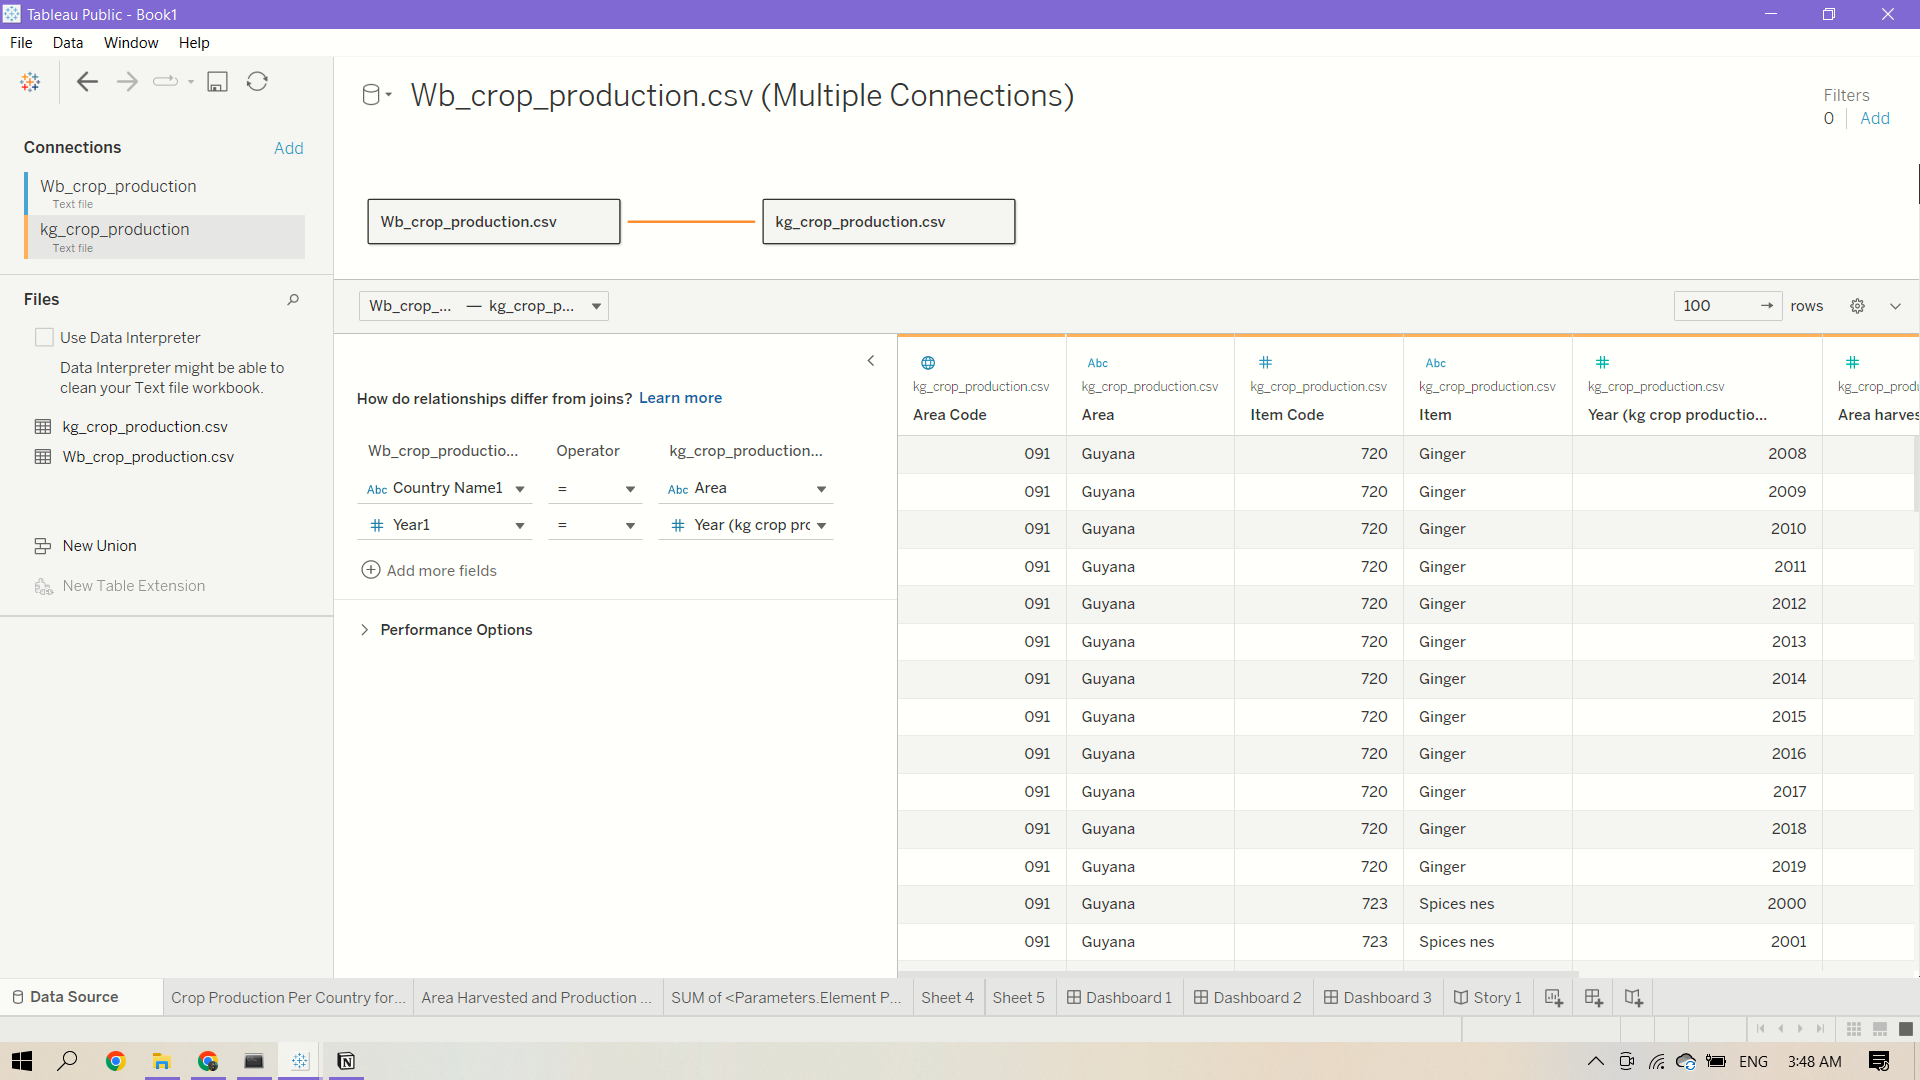

Our second step was to know many many insights from only one dashboard, this dashboard we can know all about production and area harvested for each of the following or a wanted combination from them:
1) Crop
2) Year
3) Region
4) Country
 
**To acheive this we did the following:**
- Plotted the harvested area and production along years on a dual axis chart filtered by crop and country.
- Made a parameter called "element parameter" that is either area harvested or production.
- Used the parameter in a calculated field called "choosen element" to return the required column depending on the parameter value.
- Used the calculated field in the columns to switch dynamically between the 2 columns in only 1 chart.
- From analytics Applied clustering the crops into 2 clusters depending on the parameter.
- Added clustering to colors to color the outpreforming crops in each region.
- Applied filtering action on the charts in the dashboard to make them dynamic.
- Applied the country filter to the whole worksheet.

Now, we can know the production and area of any crop at any region in any country at any year.

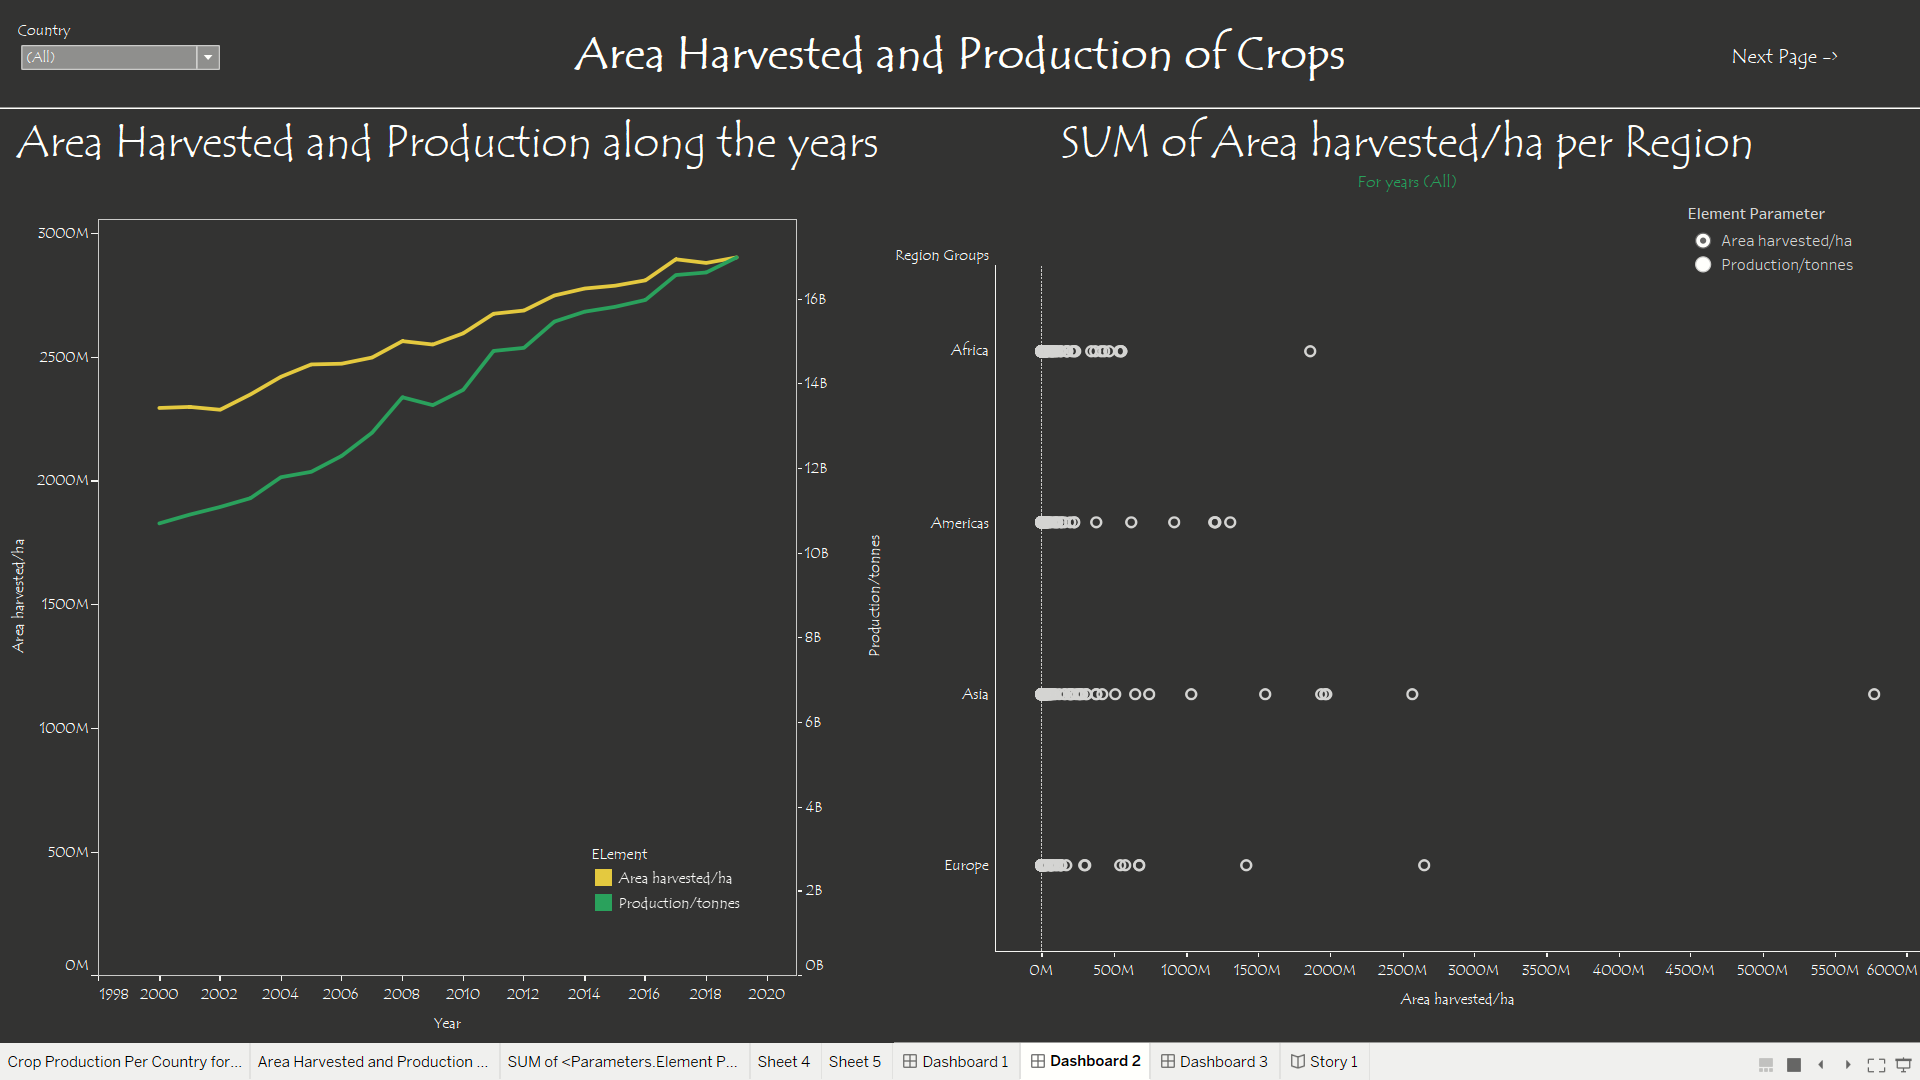

Let's examine the answer to the question **"Is Area Harvested Correlated with the amount of production for all crops?"**

For example, here, for the potatoes in europe, although that the harvested area is decreasing along the years the production appears to be somewhat steady of not much affected by it's change this could mean that the country developed a new technique that saves the production and therefore it is a good place to invest.

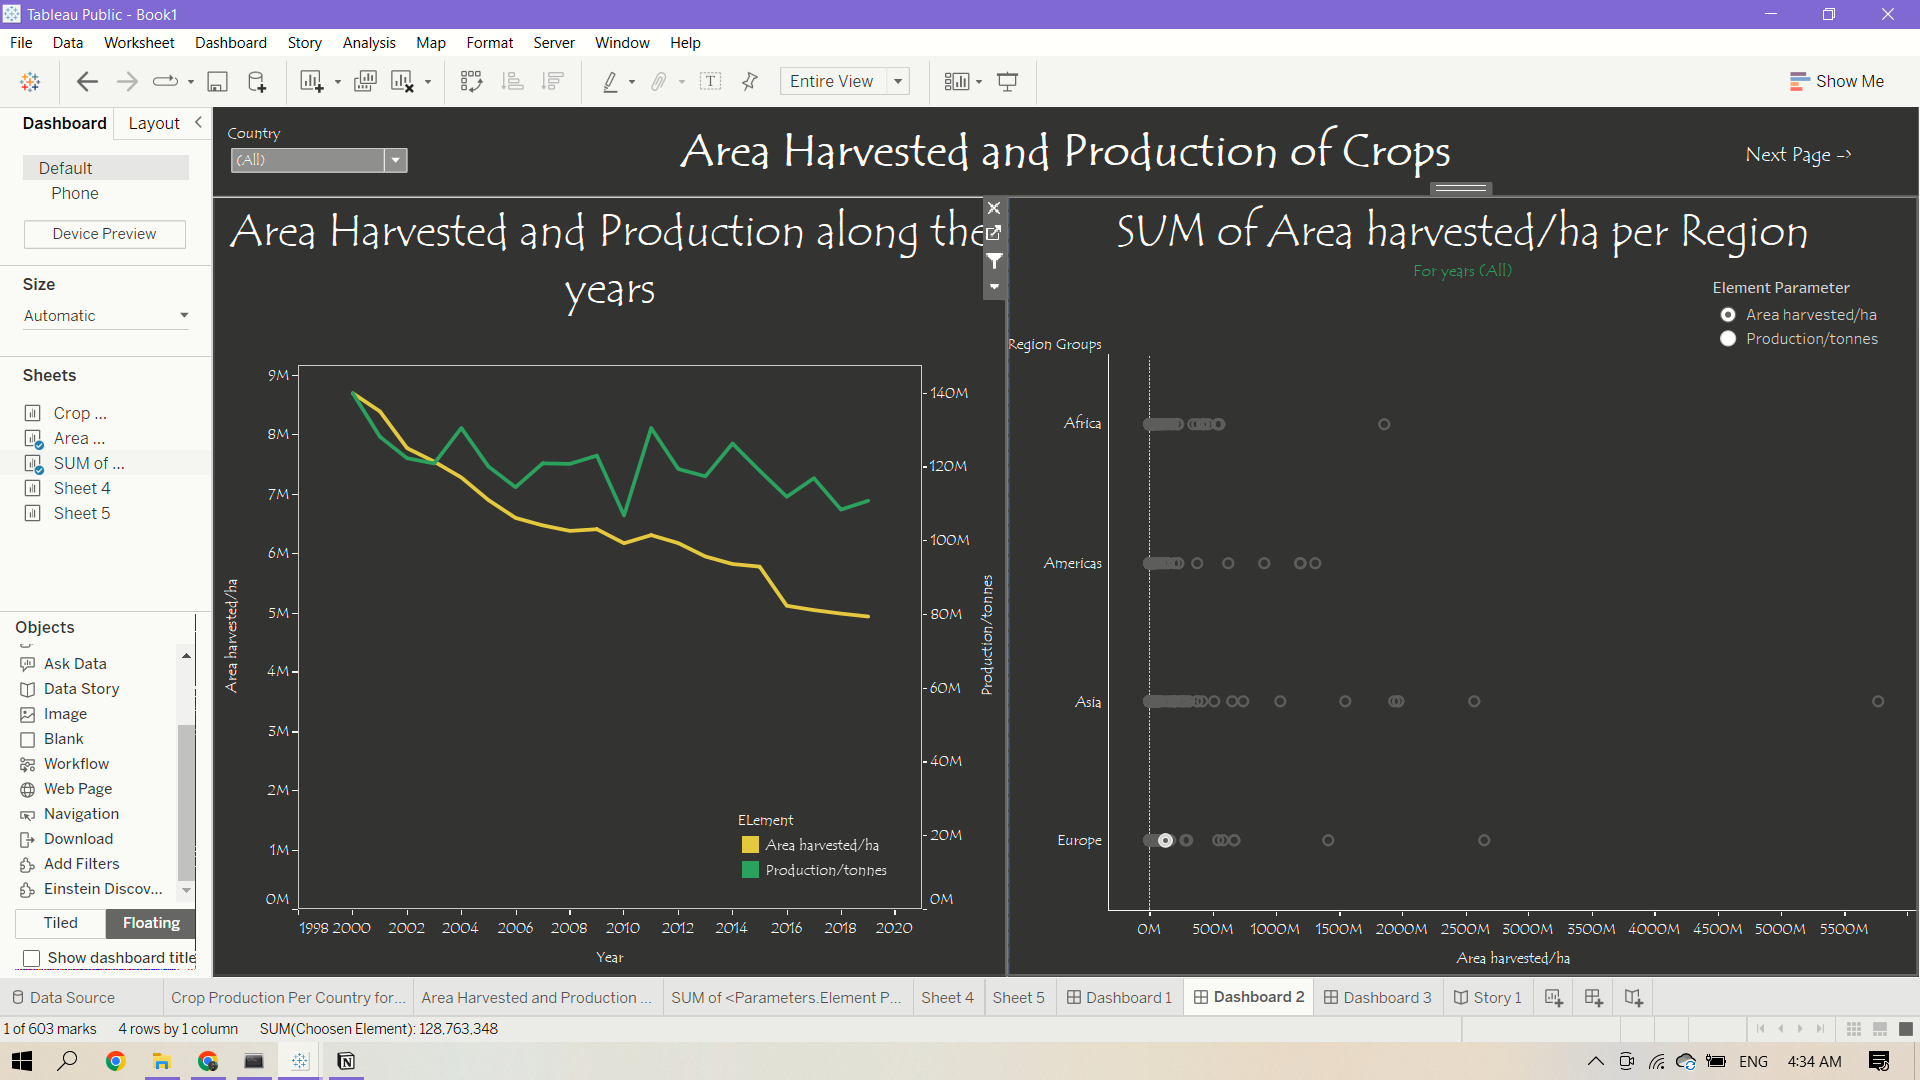

also here, For rice in Americas, although the area harvested is decreasing, The production is increasing and this means that the country may be going to be a pioneer in rice production soon which means making offers and importing  or exporting with them could be beneficial.

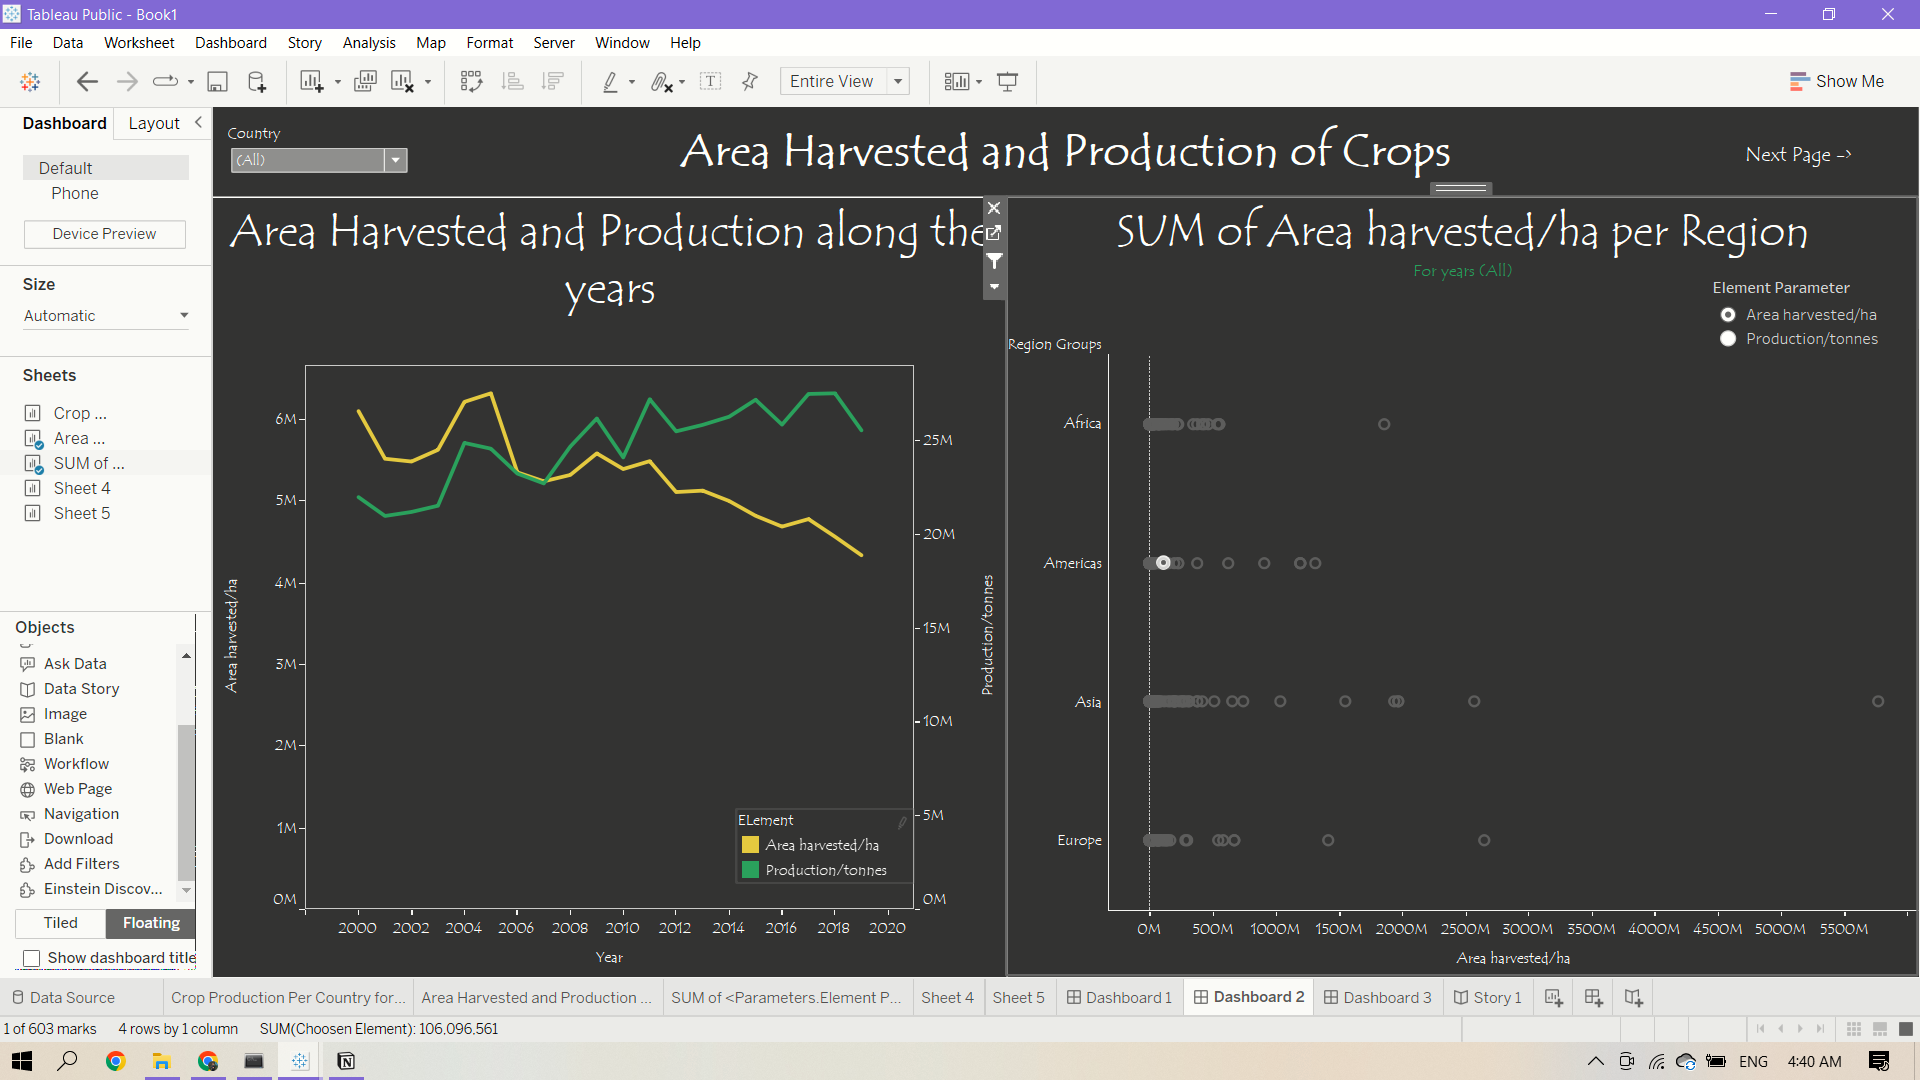

This Dashboard helped us answer our second 3 questions:

4) How does the crop Production and Area harvested change over the years for specific crops and specific region/country?
5) Is "Area Harvested" correlated with the amount of production for all crops?
6) Which crops are the outliers (most production) in each region?

Now, For answering the last 3 questions and further gaining knowledge about our data, we will go to the third dashboard.

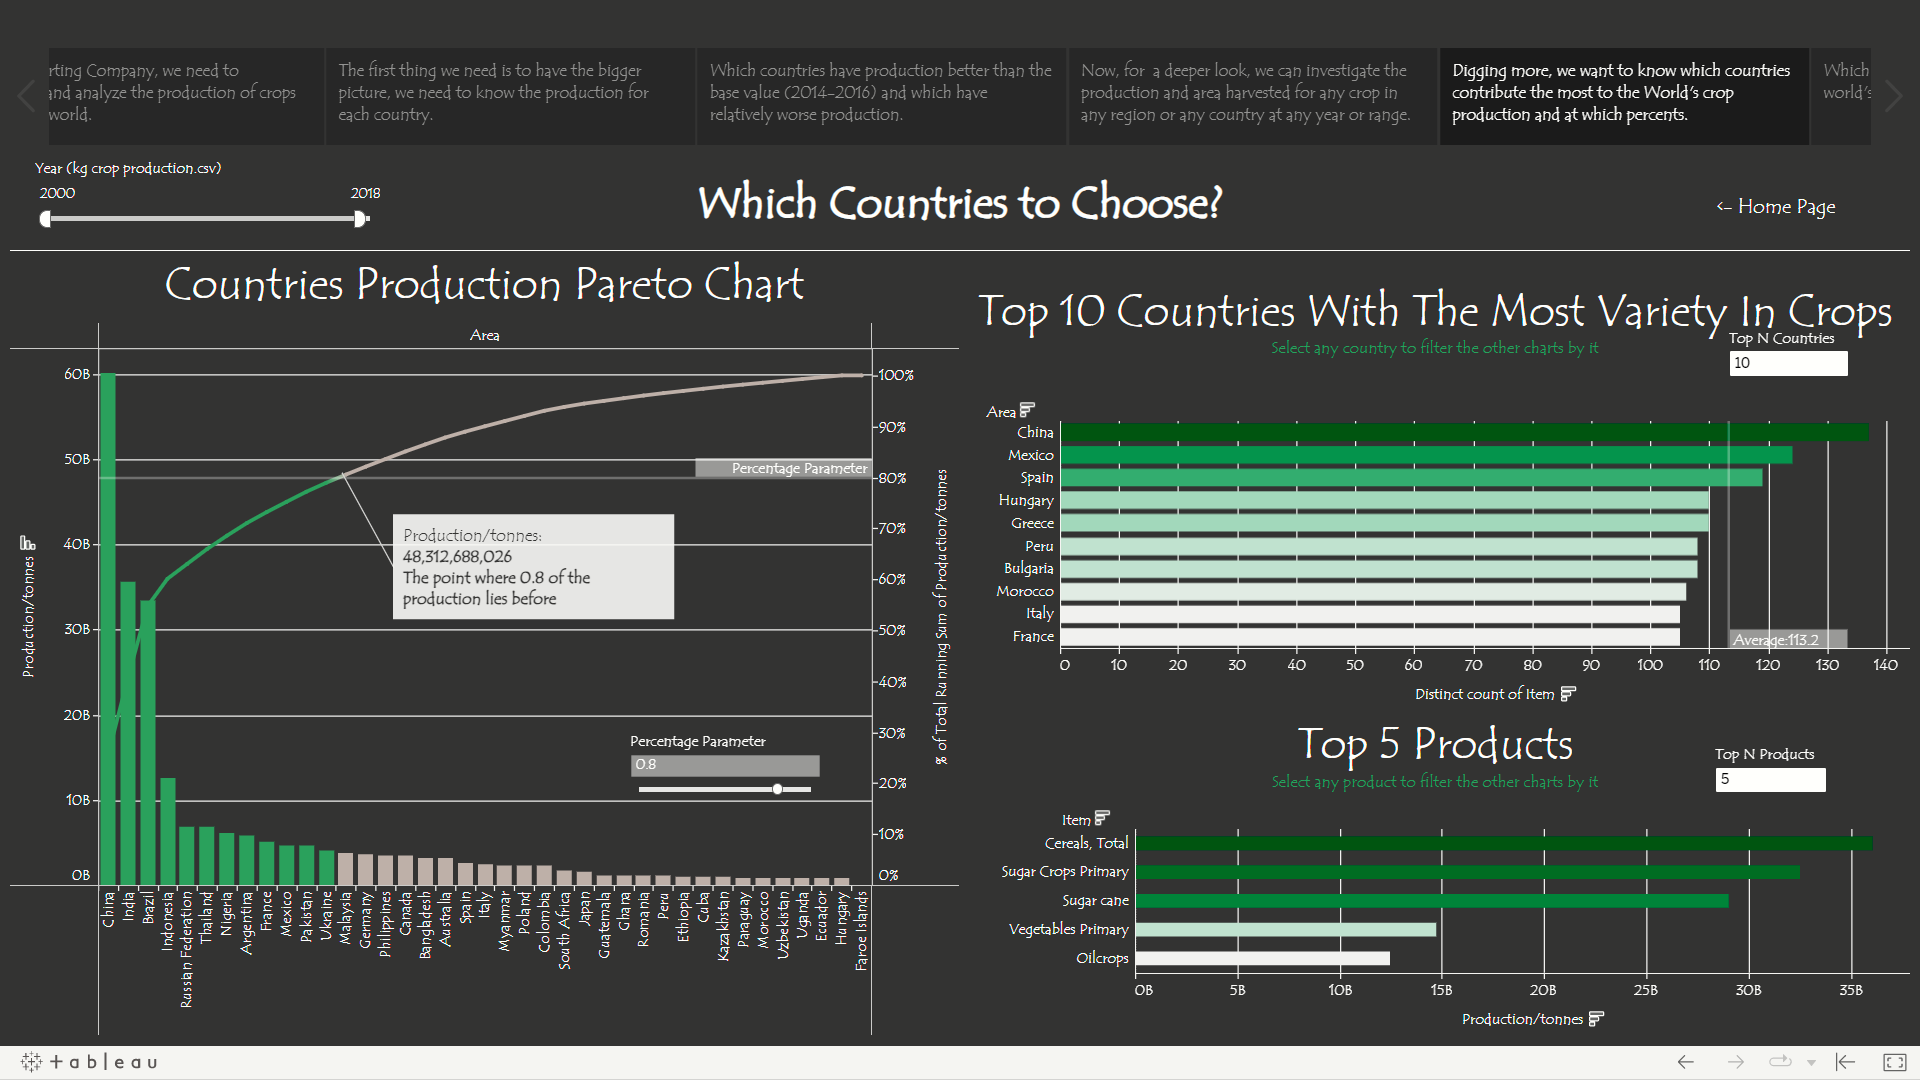

**NOTE: All the clutter in this page doesn't appear when working on tableau public desktop but when uploaded in appears unfortunatly, going to figure out why.**

Here is how it looks in tableau desktop 

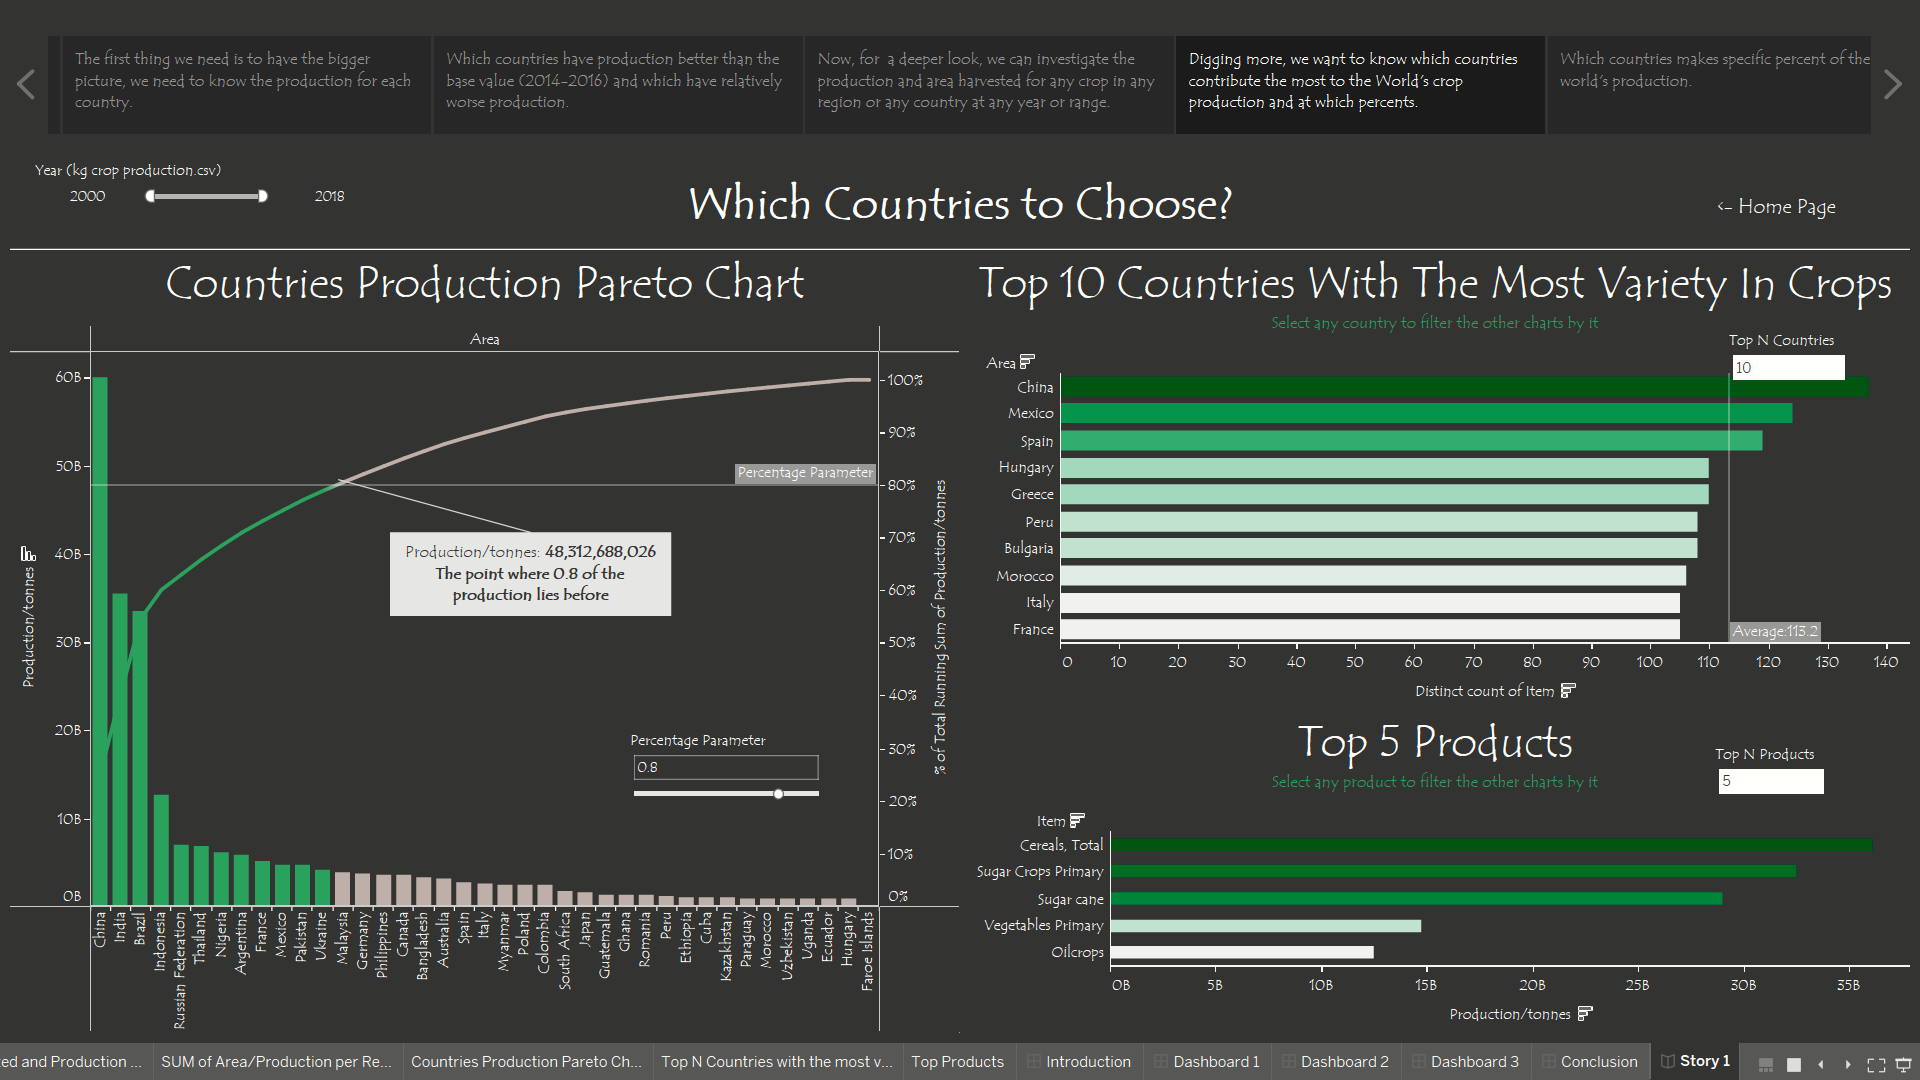

For this I used:
- Top N parameters
- Percentage Parameters 
- Many calculated fields
- Filtering and highlighting actions
- Navigation buttons 
- Download button (In the first page)
- Reference lines
- Dynamic titles

Finally, this dashboard helped us understand alot and make decisions in our business based on it, here is a few.

## Conclusions and Recommendations

1) We should consider trade with countries that are evolving and have production more than the average (base) production as this may indicate a good place to import our products.
2) Also countries with production lower than the base may indicate a good place to export our products.
3) The relation between area harvested and production may indicate alot about the country, region or crop:
    - The countries with increasing both production and area seems like a good place for importing as they care about agriculture and increase the area of crops.
    - The countries with increasing production and constant or decreasing area indicates that these countries may've found a way to increase production without the need of increasing the area and they may have a new technological way so we may consider trading with them as this may influence us positively in the future.
    - Countries with decreasing production and area seems like a good place to start exporting our products as they have a lack in production of some or all crops.
    - And countries with decreasing in production while area is increasing seems to have a problem where we can take advantage of and start exporting our products to them as a help.
4) Knowing the countries that represent most of the world's prooduction can help us assess which countries to deal with and who needs our products specially when we filter by crop.
5) knowing the countries with the most varaity in crops may indicate a good importing place for the rare crops.
6) Filtering automatically by country to get the top crops for each country keeps us updated on the best things to import.